# Ecuaciones Diferenciales

---
### Profesor: Juan Marcos Marín
### Profesor: Daniel Ruiz
### Nombre: Simón Cortés Ocampo y Manuela Gómez Colorado
*Métodos computacionales 2024-II*

---

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 1
El número de átomos radiactivos que decaen en un período de tiempo dado es proporcional al número de átomos en la muestra:

$$
\frac{dN}{dt} = -\lambda N
$$

con $\lambda=\frac{\ln{2}}{t_{1/2}}$ siendo $t_{1/2}$ el tiempo de vida media.

Escriba un programa que utilice el método de Euler para graficar $N(t)$. Compare con la solución exacta, $N(t) = N_0 e^{-\lambda t}$, para comparación. Tome $N_0=1000$ y $t_{1/2}=15$ horas, lo cual es el valor para el $^{24}Na$.

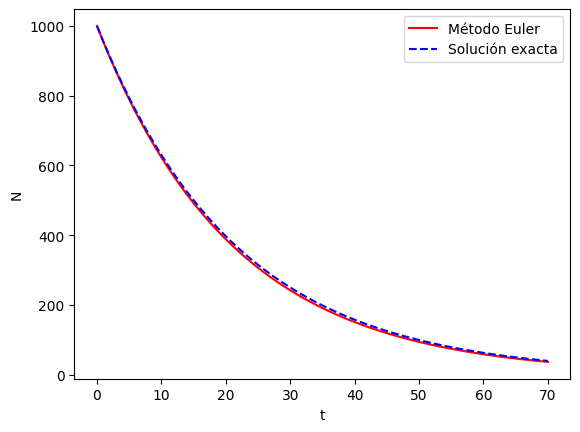

In [ ]:
N0 = 1000
t_medio = 15
h = 1

t_inicial = 0
t_final = 70

lambda_ = np.log(2)/t_medio

f = lambda t, N: -lambda_*N

n = int((t_final - t_inicial)/h)

t_ = np.zeros(n+1)
N = np.zeros(n+1)

#Condiciones iniciales
t_[0] = t_inicial
N[0] = N0

#Método Euler
for i in range(n):
  t_[i+1] = t_[i]+h
  N[i+1] = N[i] + h*f(t_[i], N[i])

plt.plot(t_,N,'r-',label='Método Euler')
N_exacta = lambda t : N0*np.exp(-lambda_*t_)
N_exacta_t = N_exacta(t_)
plt.plot(t_,N_exacta_t,'b--',label='Solución exacta')
plt.legend()
plt.xlabel('t')
plt.ylabel('N')
plt.show()

# 2
El péndulo de la figura está suspendido de un collar deslizante. El sistema está en reposo cuando se le impone un movimiento oscilante $y(t)=Y \sin{\omega t}$ sobre la cuenta, comenzando en $t=0$. La ecuación diferencial que describe el movimiento del péndulo es

$$\ddot{\theta}=-\frac{g}{L} \sin{\theta} + \frac{\omega^2}{L}Y \cos{\theta}\sin{\omega t} $$

Grafique $\theta$ vs $t$ con $0\leq t \leq 10s$ y determine el $\theta$ mayor en este intervalo. Use $g=9.8 \ m/s^2$, $L=1.0 \ m$, $Y=0.25 \ m$ y $\omega=2.5 \ rad/s$. Con $\theta(0)=0$ y $\dot{\theta}(0)=0.1 \ rad/s$.


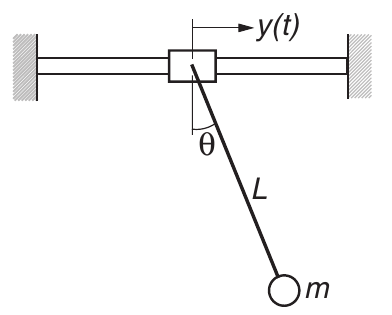

El theta máximo es 0.8900763427024491 radianes


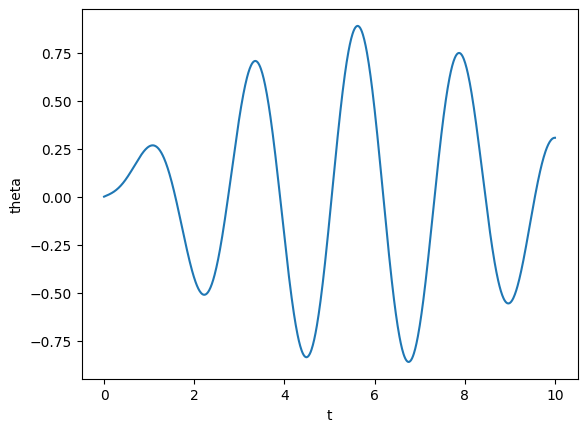

In [ ]:
g = 9.8
L = 1.0
Y = 0.25
omega = 2.5

f = lambda t,theta,thetaprima: -(g/L)*np.sin(theta) + (omega**2/L)*Y*np.cos(theta)*np.sin(omega*t)

t_inicial = 0
t_final = 10

h = 0.01
n = int((t_final-t_inicial)/h)

t_ = np.zeros(n+1)
theta_ = np.zeros(n+1)
theta_prima = np.zeros(n+1)

#Condiciones iniciales
t_[0] = t_inicial
theta_[0] = 0
theta_prima[0] = 0.1

#Método Euler
for i in range(n):
    t_[i+1] = t_[i] + h
    theta_[i+1] = theta_[i] + h*theta_prima[i]
    theta_prima[i+1] = theta_prima[i] + h*f(t_[i],theta_[i],theta_prima[i])

max_theta=np.max(theta_)
print(f'El theta máximo es {max_theta} radianes')

plt.plot(t_,theta_)
plt.xlabel('t')
plt.ylabel('theta')
plt.show()

# 3
El circuito eléctrico de la figura cuenta con una resistencia y un capacitor:

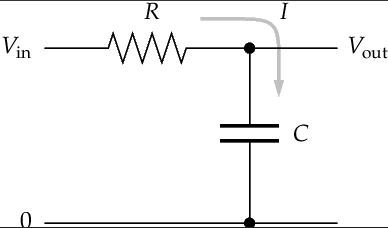


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.


In [ ]:
def solucion(t_inicial,t_final,h,V_inicial,RC):
  n = int((t_final-t_inicial)/h)
  t_ = np.zeros(n+1)
  V_ = np.zeros(n+1)

  t_[0] = t_inicial
  V_[0] = V_inicial

  for i in range(n):
    t_[i+1] = t_[i] + h

    if np.floor(2*t_[i+1]) % 2 == 0:
      V_in = 1
    else:
      V_in = -1

    f = lambda t,V: 1/(RC)*(V_in - V)

    #Runge-Kutta orden 4
    k1 = h*f(t_[i],V_[i])
    k2 = h*f(t_[i]+h/2,V_[i]+k1/2)
    k3 = h*f(t_[i]+h/2,V_[i]+k2/2)
    k4 = h*f(t_[i]+h,V_[i]+k3)
    V_[i+1] = V_[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

  return t_,V_

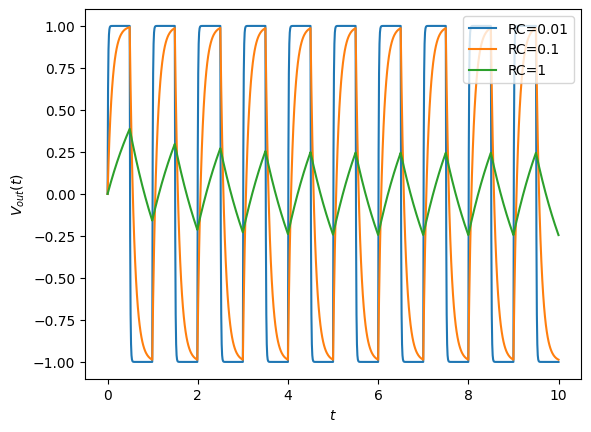

In [ ]:
t_inicial = 0
t_final = 10
V_inicial = 0
h = 0.01
RC_1 =0.01
RC_2 = 0.1
RC_3 = 1

t_vals1,V_vals1 = solucion(t_inicial,t_final,h,V_inicial,RC_1)
t_vals2,V_vals2 = solucion(t_inicial,t_final,h,V_inicial,RC_2)
t_vals3,V_vals3 = solucion(t_inicial,t_final,h,V_inicial,RC_3)

plt.plot(t_vals1,V_vals1, label='RC=0.01')
plt.plot(t_vals2,V_vals2, label='RC=0.1')
plt.plot(t_vals3,V_vals3, label='RC=1')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$V_{out}(t)$')
plt.show()

# 4


Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con h=0.001 y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

In [ ]:
def desplazamiento_angular(f,t0,tf,u0,u_prima_0,h):
  n = int((tf-t0)/h)
  t_ = np.zeros(n+1)
  u_ = np.zeros(n+1)
  u_prima = np.zeros(n+1)
  t_[0] = t0
  u_[0] = u0
  u_prima[0] = u_prima_0

  for i in range(n):
    t_[i+1] = t_[i] + h

    k1_u = h*u_prima[i]
    k1_u_prima = h*f(t_[i],u_[i],u_prima[i])

    k2_u = h*(u_prima[i] + k1_u_prima/2)
    k2_u_prima = h*f(t_[i]+h/2, u_[i]+k1_u/2, u_prima[i]+k1_u_prima/2)

    u_[i+1] = u_[i] + k2_u
    u_prima[i+1] = u_prima[i] + k2_u_prima

  return t_,u_

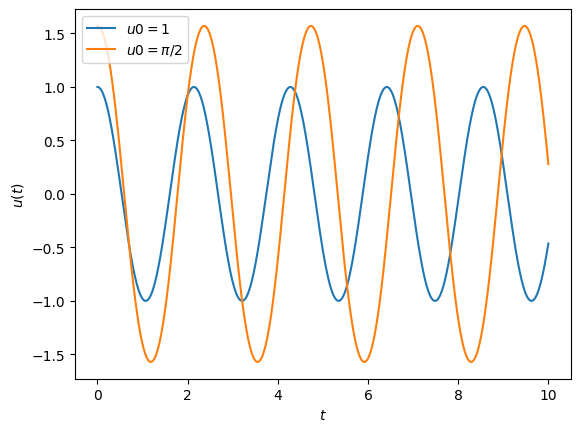

In [ ]:
g = 9.81
l = 1.0
h = 0.001
f = lambda t,u,u_prima: -g/l*np.sin(u)
t0 = 0
tf = 10
u_prima_0 = 0

t_1,u_1 = desplazamiento_angular(f,t0,tf,1,u_prima_0,h)
t_2,u_2 = desplazamiento_angular(f,t0,tf,np.pi/2,u_prima_0,h)

plt.plot(t_1,u_1, label='$u0=1$')
plt.plot(t_2,u_2, label='$u0=\pi/2$')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.show()

<ipython-input-19-87113c2e71bc>:12: RuntimeWarning: divide by zero encountered in scalar divide
  func = lambda z: 1/np.sqrt((1-z**2)*(1-alfa*z**2))
<ipython-input-19-87113c2e71bc>:13: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  K = quad(func,0,1)[0]


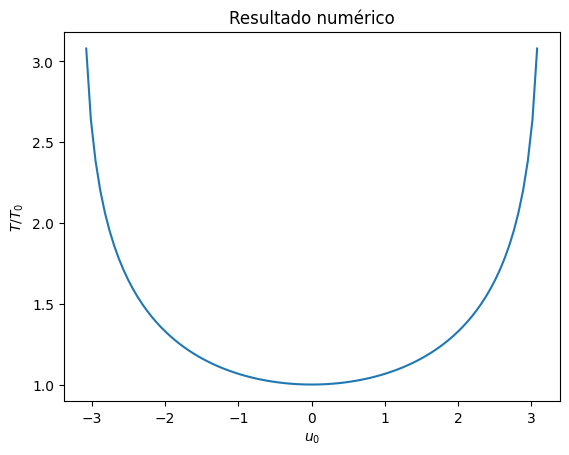

In [19]:
from scipy.integrate import quad
import sympy as sp
from sympy import integrate, symbols

u0 = np.linspace(-np.pi,np.pi,100)

T_T0_vals = np.zeros(len(u0))
alfas = []

for n in range(len(u0)):
  alfa = np.sin(u0[n]/2)**2
  func = lambda z: 1/np.sqrt((1-z**2)*(1-alfa*z**2))
  K = quad(func,0,1)[0]
  T_T0 = (2/np.pi)*K
  T_T0_vals[n] = T_T0
  alfas.append(alfa)

plt.plot(u0,T_T0_vals)
plt.title('Resultado numérico')
plt.xlabel('$u_0$')
plt.ylabel('$T/T_0$')
plt.show()


In [ ]:
#Resultado analítico
u0_vals = np.linspace(-np.pi,np.pi,100)
z,u0_sym = sp.symbols('z u0')
alfa = sp.sin(u0_sym/2)**2
func_K = 1/sp.sqrt((1-z**2)*(1-alfa*z**2))
K = integrate(func_K,(z,0,1-1e-5))

K_sym = []
for n in range(100):
  K_val = K.subs(u0_sym, u0_vals[n]).evalf()
  K_sym.append(K_val)

print(K_sym)

[6.10303382276111, 4.69732768087656, 4.07692351783409, 3.69877097618850, 3.42766841791737, 3.21725577607556, 3.04605832609437, 2.90234980649025, 2.77901616640602, 2.67141173006837, 2.57633270723199, 2.49147474630999, 2.41512404727208, 2.34597083640901, 2.28299125815052, 2.22536959976317, 2.17244536031919, 2.12367620133206, 2.07861137721761, 2.03687227394091, 1.99813788644884, 1.96213380131830, 1.92862371468241, 1.89740281523902, 1.86829256044041, 1.84113650788393, 1.81579695607464, 1.79215221322701, 1.77009435861758, 1.74952739405520, 1.73036570718164, 1.71253278616912, 1.69596013873133, 1.68058637845207, 1.66635644913242, 1.65322096378527, 1.64113563951029, 1.63006081308938, 1.61996102499005, 1.61080466173013, 1.60256364837319, 1.59521318439176, 1.58873151732946, 1.58309974967399, 1.57830167516403, 1.57432364143177, 1.57115443645601, 1.56878519679112, 1.56720933596299, 1.56642249179916, 1.56642249179916, 1.56720933596299, 1.56878519679112, 1.57115443645601, 1.57432364143177, 1.5783016

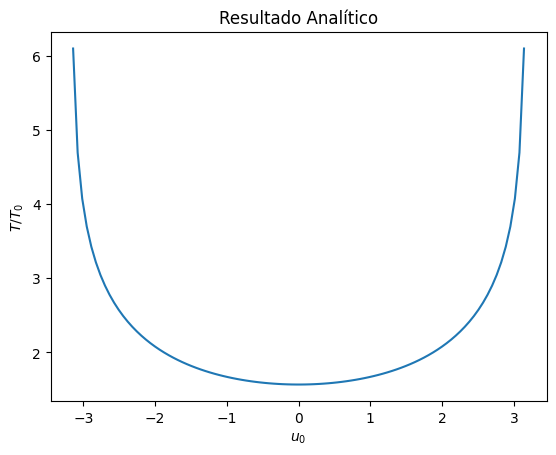

In [ ]:
plt.plot(u0_vals,K_sym)
plt.title('Resultado Analítico')
plt.xlabel('$u_0$')
plt.ylabel('$T/T_0$')
plt.show()

# 5

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$
\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},
$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


In [ ]:
def oscilador(t0,tf,x0,v0,h,gamma,k,m,F):
  n = int((tf-t0)/h)
  t_ = np.zeros(n+1)
  x_ = np.zeros(n+1)
  v_ = np.zeros(n+1)
  x_[0] = x0
  v_[0] = v0
  t_[0] = t0
  omega = np.sqrt(k/m)

  f = lambda t,x,v: (F/m) - gamma*v - (omega**2)*x

  for i in range(n):
    t_[i+1] = t_[i] + h
    x_[i+1] = x_[i] + h*v_[i]
    v_[i+1] = v_[i] + h*f(t_[i],x_[i],v_[i])

  return t_,x_,v_

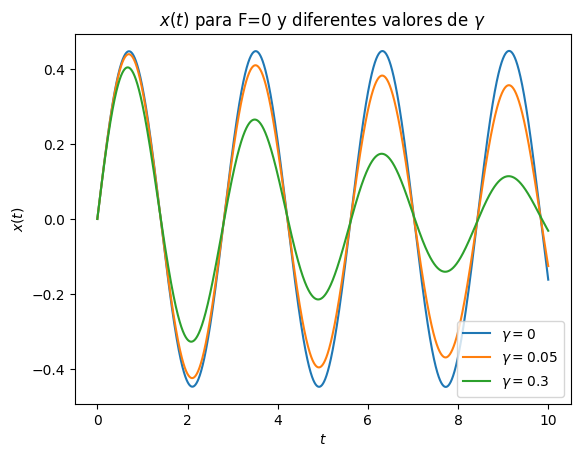

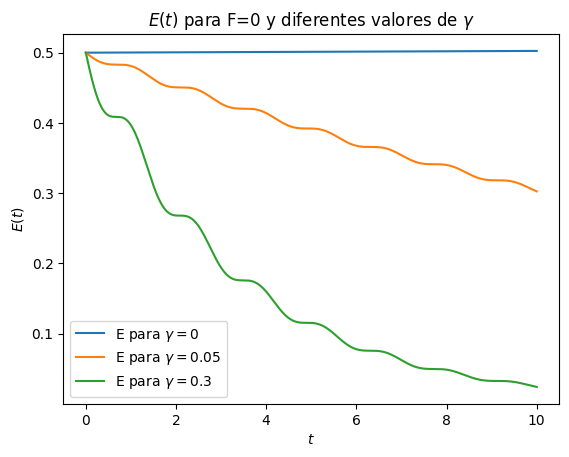

In [ ]:
t0 = 0
tf = 10
x0 = 0
v0 = 1
h = 0.0001
k = 5
m = 1.0

t_1, x_1, v_1 = oscilador(t0,tf,x0,v0,h,0,k,m,0)
t_2, x_2, v_2= oscilador(t0,tf,x0,v0,h,0.05,k,m,0)
t_3, x_3, v_3 = oscilador(t0,tf,x0,v0,h,0.3,k,m,0)

E = lambda x,v: (1/2)*m*v**2 + (1/2)*k*x**2
func_E1 = E(x_1,v_1)
func_E2 = E(x_2,v_2)
func_E3 = E(x_3,v_3)

plt.plot(t_1,x_1, label='$\gamma=0$')
plt.plot(t_2,x_2, label='$\gamma=0.05$')
plt.plot(t_3,x_3, label='$\gamma=0.3$')
plt.legend()
plt.title(f'$x(t)$ para F=0 y diferentes valores de $\gamma$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.show()

plt.plot(t_1,func_E1, label='E para $\gamma=0$')
plt.plot(t_2,func_E2, label = 'E para $\gamma=0.05$ ')
plt.plot(t_3, func_E3, label = 'E para $\gamma=0.3$')
plt.legend()
plt.title(f'$E(t)$ para F=0 y diferentes valores de $\gamma$')
plt.xlabel('$t$')
plt.ylabel('$E(t)$')
plt.show()



In [ ]:
def oscilador2(t0,tf,x0,v0,h,gamma,k,m,F):
  n = int((tf-t0)/h)
  t_ = np.zeros(n+1)
  x_ = np.zeros(n+1)
  v_ = np.zeros(n+1)
  x_[0] = x0
  v_[0] = v0
  t_[0] = t0
  omega = np.sqrt(k/m)

  f = lambda t,x,v: (F(t)/m) - gamma*v - (omega**2)*x

  for i in range(n):
    t_[i+1] = t_[i] + h
    x_[i+1] = x_[i] + h*v_[i]
    v_[i+1] = v_[i] + h*f(t_[i],x_[i],v_[i])

  return t_,x_,v_

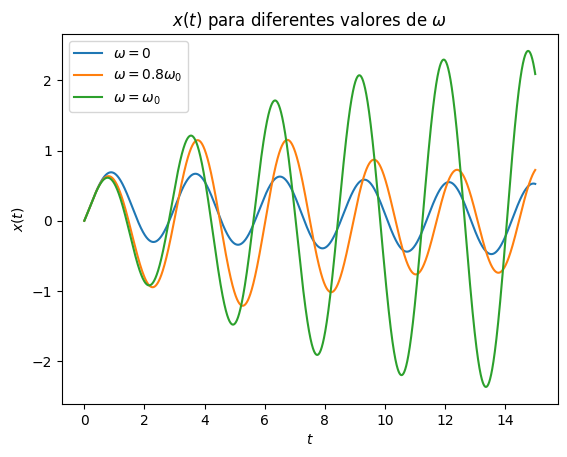

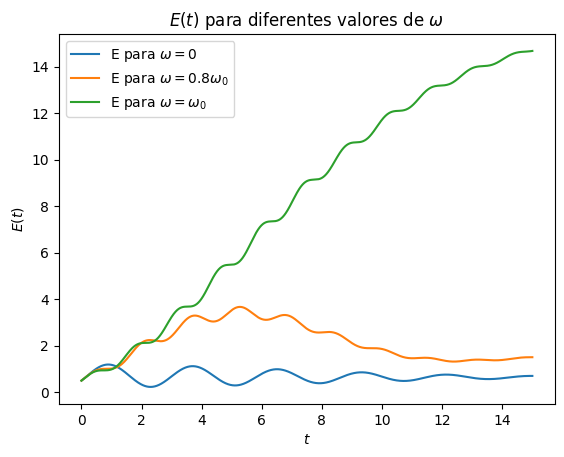

In [ ]:
t0 = 0
tf = 15
x0 = 0
v0 = 1
h = 0.001
gamma = 0
k = 5
m = 1.0

T = 10
F0 = 1

omega1 = 0
omega2 = 0.8*np.sqrt(k/m)
omega3 = np.sqrt(k/m)
F1 = lambda t: F0*np.cos(omega1*t)*np.exp((-t**2)/(T**2))
F2 = lambda t: F0*np.cos(omega2*t)*np.exp((-t**2)/(T**2))
F3 = lambda t: F0*np.cos(omega3*t)*np.exp((-t**2)/(T**2))

t_1, x_1, v_1 = oscilador2(t0,tf,x0,v0,h,gamma,k,m,F1)
t_2, x_2, v_2 = oscilador2(t0,tf,x0,v0,h,gamma,k,m,F2)
t_3, x_3, v_3 = oscilador2(t0,tf,x0,v0,h,gamma,k,m,F3)

plt.plot(t_1,x_1, label='$\omega=0$')
plt.plot(t_2,x_2, label='$\omega=0.8 \omega_0$')
plt.plot(t_3,x_3, label='$\omega=\omega_0$')
plt.legend()
plt.title(f'$x(t)$ para diferentes valores de $\omega$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.show()

E = lambda x,v: (1/2)*m*v**2 + (1/2)*k*x**2
func_E1 = E(x_1,v_1)
func_E2 = E(x_2,v_2)
func_E3 = E(x_3,v_3)

plt.plot(t_1,func_E1, label='E para $\omega=0$')
plt.plot(t_2,func_E2, label = 'E para $\omega=0.8 \omega_0$')
plt.plot(t_3, func_E3, label = 'E para $\omega=\omega_0$')
plt.legend()
plt.title(f'$E(t)$ para diferentes valores de $\omega$')
plt.xlabel('$t$')
plt.ylabel('$E(t)$')
plt.show()

# 6

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- α = 0.8 (tasa de reproducción de los conejos)
- β = 0.04 (tasa de depredación de conejos por zorros)
- γ = 0.3 (tasa de mortalidad natural de los zorros)
- δ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


a. Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b. Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c. Compare los resultados de Euler y RK4 mediante:
   * Gráficas de la evolución temporal de ambas poblaciones
   * Diagrama de fase (x vs y)
   * Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

d. Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

e. Investigue cómo las variaciones en los parámetros α, β, γ y δ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.



In [21]:
#Euler

def poblacion_euler(t0,tf,x0,y0,h,alfa,beta,gama,delta):
  n = int((tf-t0)/h)
  t_ = np.zeros(n+1)
  x_ = np.zeros(n+1)
  y_ = np.zeros(n+1)
  t_[0] = t0
  x_[0] = x0
  y_[0] = y0
  fx  = lambda t,x,y: alfa*x - beta*x*y
  fy = lambda t,x,y: -gama*y + delta*x*y

  for i in range(n):
    t_[i+1] = t_[i] + h
    x_[i+1] = x_[i] + h*fx(t_[i],x_[i],y_[i])
    y_[i+1] = y_[i] + h*fy(t_[i],x_[i],y_[i])

  return t_,x_,y_

#RK orden 2

def poblacion_rk2(t0,tf,x0,y0,h,alfa,beta,gama,delta):
  n = int((tf-t0)/h)
  t_ = np.zeros(n+1)
  x_ = np.zeros(n+1)
  y_ = np.zeros(n+1)
  t_[0] = t0
  x_[0] = x0
  y_[0] = y0
  fx  = lambda t,x,y: alfa*x - beta*x*y
  fy = lambda t,x,y: -gama*y + delta*x*y

  for i in range(n):
    t_[i+1] = t_[i] + h

    k1_x = fx(t_[i],x_[i],y_[i])
    k1_y = fy(t_[i],x_[i],y_[i])

    k2_x = fx(t_[i] + h/2, x_[i] + h*k1_x/2, y_[i] + h*k1_y/2)
    k2_y = fy(t_[i] + h/2, x_[i] + h*k1_x/2, y_[i] + h*k1_y/2)

    x_[i+1] = x_[i] + h*k2_x
    y_[i+1] = y_[i] + h*k2_y

  return t_,x_,y_

#RK orden 4

def poblacion_rk4(t0,tf,x0,y0,h,alfa,beta,gama,delta):
  n = int((tf-t0)/h)
  t_ = np.zeros(n+1)
  x_ = np.zeros(n+1)
  y_ = np.zeros(n+1)
  t_[0] = t0
  x_[0] = x0
  y_[0] = y0
  fx  = lambda t,x,y: alfa*x - beta*x*y
  fy = lambda t,x,y: -gama*y + delta*x*y

  for i in range(n):
    t_[i+1] = t_[i] + h

    k1_x = h*fx(t_[i],x_[i],y_[i])
    k1_y = h*fy(t_[i],x_[i],y_[i])

    k2_x = h*fx(t_[i] + h/2, x_[i] + k1_x/2, y_[i] + k1_y/2)
    k2_y = h*fy(t_[i] + h/2, x_[i] + k1_x/2, y_[i] + k1_y/2)

    k3_x = h*fx(t_[i] + h/2, x_[i] + k2_x/2, y_[i] + k2_y/2)
    k3_y = h*fy(t_[i] + h/2, x_[i] + k2_x/2, y_[i] + k2_y/2)

    k4_x = h*fx(t_[i] + h, x_[i] + k3_x, y_[i] + k3_y)
    k4_y = h*fy(t_[i] + h, x_[i] + k3_x, y_[i] + k3_y)

    x_[i+1] = x_[i] + (1/6)*(k1_x + 2*k2_x + 2*k3_x + k4_x)
    y_[i+1] = y_[i] + (1/6)*(k1_y + 2*k2_y + 2*k3_y + k4_y)

  return t_,x_,y_

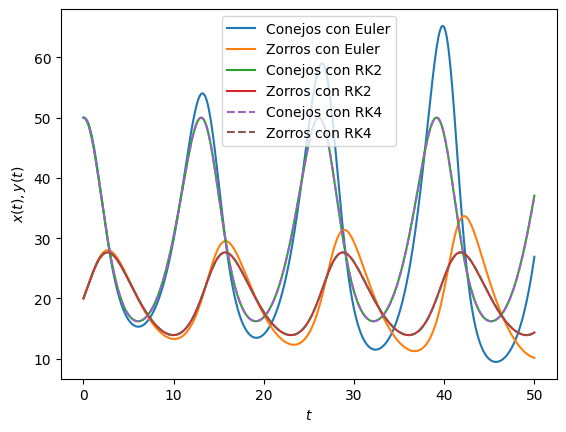

In [22]:
t0 = 0
tf = 50
x0 = 50
y0 = 20
h = 0.1
alfa = 0.8
beta = 0.04
gama = 0.3
delta = 0.01

t_1,x_1,y_1 = poblacion_euler(t0,tf,x0,y0,h,alfa,beta,gama,delta)
t_2,x_2,y_2 = poblacion_rk2(t0,tf,x0,y0,h,alfa,beta,gama,delta)
t_3,x_3,y_3 = poblacion_rk4(t0,tf,x0,y0,h,alfa,beta,gama,delta)

plt.plot(t_1,x_1, label = 'Conejos con Euler')
plt.plot(t_1,y_1, label = 'Zorros con Euler')

plt.plot(t_2,x_2,label = 'Conejos con RK2')
plt.plot(t_2,y_2,label = 'Zorros con RK2')

plt.plot(t_3,x_3, '--', label = 'Conejos con RK4')
plt.plot(t_3,y_3, '--',label = 'Zorros con RK4')

plt.legend()
plt.xlabel('$t$')
plt.ylabel('$x(t), y(t)$')
plt.show()

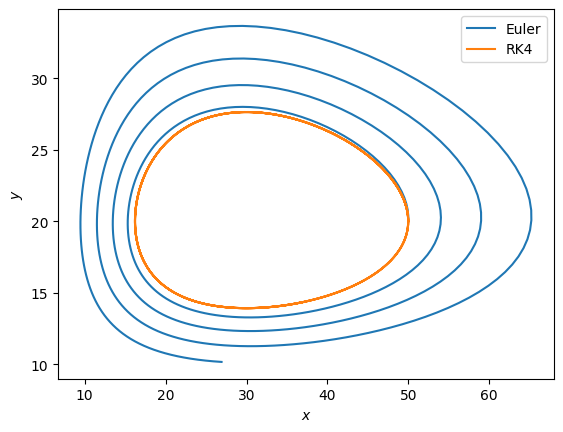

In [23]:
#Diagrama de Fase

plt.plot(x_1,y_1, label = 'Euler')
plt.plot(x_3,y_3, label = 'RK4')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

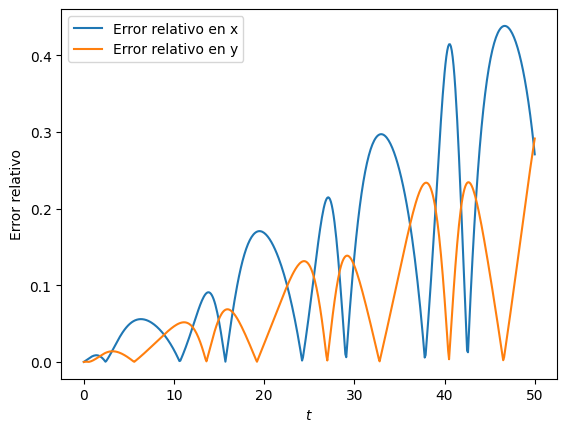

In [24]:
#Error relativo

error_x = np.abs(x_1 - x_3)/x_3
error_y = np.abs(y_1 - y_3)/y_3

plt.plot(t_1,error_x, label = 'Error relativo en x')
plt.plot(t_1,error_y, label = 'Error relativo en y')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('Error relativo')
plt.show()

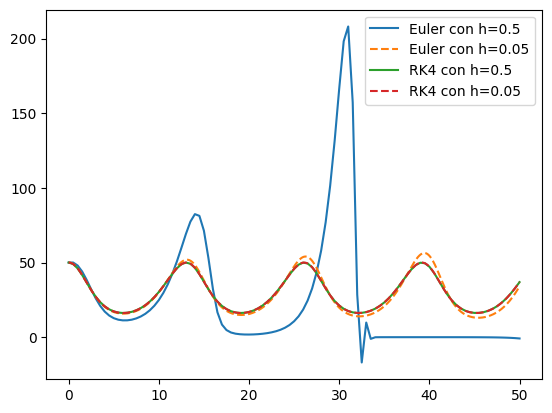

In [25]:
#Estabilidad métodos

h1=0.5
h2=0.05

#Euler
t_1_h1,x_1_h1,y_1_h1 = poblacion_euler(t0,tf,x0,y0,h1,alfa,beta,gama,delta)
t_1_h2,x_1_h2,y_1_h2 = poblacion_euler(t0,tf,x0,y0,h2,alfa,beta,gama,delta)

#RK4
t_3_h1,x_3_h1,y_3_h1 = poblacion_rk4(t0,tf,x0,y0,h1,alfa,beta,gama,delta)
t_3_h2,x_3_h2,y_3_h2 = poblacion_rk4(t0,tf,x0,y0,h2,alfa,beta,gama,delta)

plt.plot(t_1_h1,x_1_h1, label = 'Euler con h=0.5')
plt.plot(t_1_h2,x_1_h2,'--', label = 'Euler con h=0.05')
plt.plot(t_3_h1,x_3_h1, label = 'RK4 con h=0.5')
plt.plot(t_3_h2,x_3_h2,'--', label = 'RK4 con h=0.05')
plt.legend()
plt.show()

Vemos como el método de RK4 tanto para h = 0.5 como para h = 0.05 es muy similar debido a que este método es muy estable y converge muy rápido a la respuesta. Por otro lado, vemos como el método de Euler difiere mucho entre los valores de h, ya que este método es menos estable y convergente, y necesita de un h más pequeño para arrojar un resultado preciso.

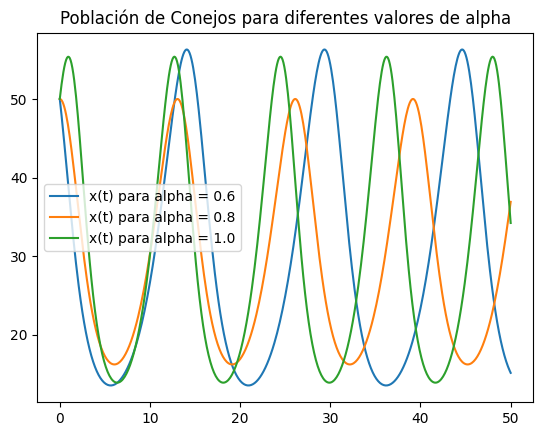

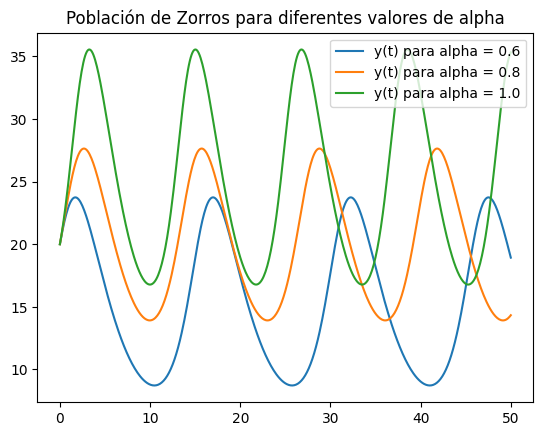

In [28]:
#Variación parámetros

alfa1 = 0.6
alfa2 = 0.8
alfa3 = 1.0

t_3_a1,x_3_a1,y_3_a1 = poblacion_rk4(t0,tf,x0,y0,h,alfa1,beta,gama,delta)
t_3_a2,x_3_a2,y_3_a2 = poblacion_rk4(t0,tf,x0,y0,h,alfa2,beta,gama,delta)
t_3_a3,x_3_a3,y_3_a3 = poblacion_rk4(t0,tf,x0,y0,h,alfa3,beta,gama,delta)

plt.plot(t_3, x_3_a1, label = 'x(t) para alpha = 0.6')
plt.plot(t_3, x_3_a2, label = 'x(t) para alpha = 0.8')
plt.plot(t_3, x_3_a3, label = 'x(t) para alpha = 1.0')
plt.title('Población de Conejos para diferentes valores de alpha')
plt.legend()
plt.show()

plt.plot(t_3, y_3_a1, label = 'y(t) para alpha = 0.6')
plt.plot(t_3, y_3_a2, label = 'y(t) para alpha = 0.8')
plt.plot(t_3, y_3_a3, label = 'y(t) para alpha = 1.0')
plt.title('Población de Zorros para diferentes valores de alpha')
plt.legend()
plt.show()


# 7

En un laboratorio de dinámica, se estudia el comportamiento de dos péndulos acoplados mediante un resorte de constante elástica $k$. Cada péndulo de longitud $L$ y masa $m$ está suspendido de un soporte fijo y oscila en el plano. Se asume que los desplazamientos son pequeños, permitiendo aproximar el movimiento mediante ecuaciones diferenciales lineales.  

Las ecuaciones de movimiento para los ángulos $\theta_1(t)$ y $\theta_2(t)$ de los péndulos con respecto a la vertical están dadas por el sistema:  

$$
\begin{aligned}
mL^2 \ddot{\theta}_1 + mgL\theta_1 + kL^2(\theta_1 - \theta_2) &= 0, \\
mL^2 \ddot{\theta}_2 + mgL\theta_2 + kL^2(\theta_2 - \theta_1) &= 0.
\end{aligned}
$$

Definiendo el vector de estado $\mathbf{y} = [\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]^T$, escribir el sistema en forma matricial como una ecuación de primer orden:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{A}$ es la matriz de coeficientes del sistema.  

- Expresar el sistema en forma de ecuaciones diferenciales de primer orden.  
- Construir la matriz $\mathbf{A}$ del sistema.  
- Resolver el sistema utilizando el **método de Runge-Kutta de cuarto orden (RK4)**.  
- Comparar los resultados obtenidos con los distintos métodos numéricos.  
- Analizar la estabilidad de la solución y discutir los efectos de la constante $k$ en la dinámica del sistema.  
- Graficar la evolución temporal de los ángulos $\theta_1(t)$ y $\theta_2(t)$.
- Representar la trayectoria en el espacio de fases $(\theta_1, \dot{\theta}_1)$ y $(\theta_2, \dot{\theta}_2)$.  

Para la simulación, se pueden utilizar los valores:  
- $m = 1$ kg,  
- $L = 1$ m,  
- $g = 9.81$ m/s²,  
- $k = 0.5$ N/m,  
- Condiciones iniciales: $\theta_1(0) = 0.1$, $\dot{\theta}_1(0) = 0$, $\theta_2(0) = 0$, $\dot{\theta}_2(0) = 0$.  
- Intervalo de simulación: $t \in [0,10]$ s con paso $\Delta t = 0.01$ s.  


**Ecuaciones diferenciales de primer orden:**

Sea:

$$
y = [\theta_1, \dot\theta_1,\theta_2, \dot\theta_2]^T
$$

Sistema de ecuaciones a solucionar: (Ecuaciones de primer orden)

$$
y[0] = \theta_1
$$

$$
y[1] = y'[0] = \dot\theta_1
$$

$$
y[2] = \theta_2
$$

$$
y[3] = y'[2] = \dot\theta_2
$$

Entonces:

$$
\ddot \theta_1 = -\frac{g}{L}\theta_1 - \frac{k}{m}(\theta_1 - \theta_2)
$$

$$
\dot y_1 = -\frac{g}{L}y_0 - \frac{k}{m}(y_0-y_2)
$$

y

$$
\ddot \theta_2 = -\frac{g}{L}\theta_2 - \frac{k}{m}(\theta_2 - \theta_1)
$$

$$
\ddot y_2 = -\frac{g}{L}y_2 - \frac{k}{m}(y_2 - y_0)
$$


**Matriz A del sistema**

El sistema de ecuaciones diferenciales de primer orden puede escribirse en forma matricial como:

$$
\frac{d\mathbf{y}}{dt} = \mathbf{A} \mathbf{y},
$$

donde $\mathbf{y} = [y_1, y_2, y_3, y_4]^T$ y la matriz $\mathbf{A}$ es:

$$
\mathbf{A} = \begin{bmatrix}
0 & 1 & 0 & 0 \\
-\left(\frac{g}{L} + \frac{k}{m}\right) & 0 & \frac{k}{m} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{m} & 0 & -\left(\frac{g}{L} + \frac{k}{m}\right) & 0
\end{bmatrix}.
$$

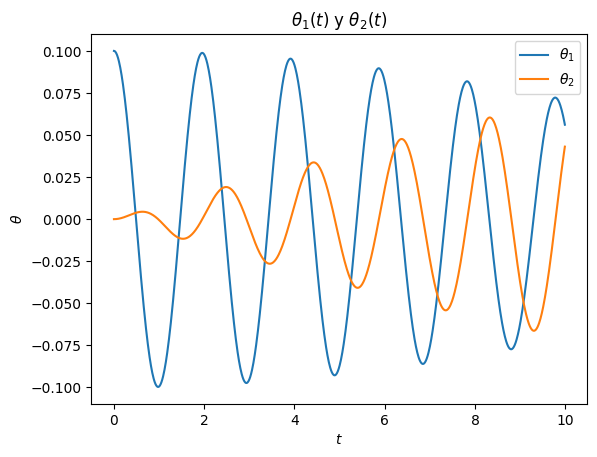

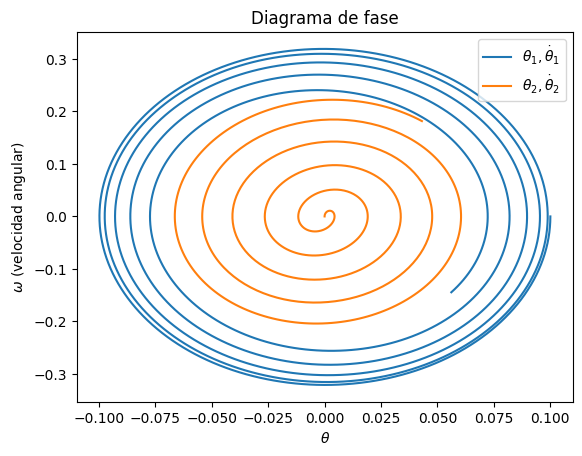

In [ ]:
#Solución con ivp

from scipy.integrate import solve_ivp

m = 1
L = 1
g = 9.81
k = 0.5

y0 = np.array([0.1,0,0,0])

t_inicial = 0
t_final = 10
dt = 0.01
t = np.arange(t_inicial, t_final, dt)

A = np.array([
    [0,1,0,0],
    [-(g/L + k/m),0, k/m ,0],
    [0,0,0,1],
    [k/m , 0, -(g/L + k/m),0]
])

def solucion(t,y):
  return A@y

sol_final = solve_ivp(solucion, [t_inicial,t_final], y0, method='RK45', t_eval=t)

t_sol = sol_final.t
y_sol0 = sol_final.y[0]
y_sol1 = sol_final.y[1]
y_sol2 = sol_final.y[2]
y_sol3 = sol_final.y[3]

plt.plot(t_sol, y_sol0, label = '$\\theta_1$')
plt.plot(t_sol, y_sol2, label = '$\\theta_2$')
plt.title('$\\theta_1(t)$ y $\\theta_2(t)$')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$\\theta$')
plt.show()

plt.plot(y_sol0, y_sol1, label = '$\\theta_1 , \dot \\theta_1$')
plt.plot(y_sol2, y_sol3, label = '$\\theta_2, \dot \\theta_2$')
plt.title('Diagrama de fase')
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('$\\omega$ (velocidad angular)')
plt.show()


In [ ]:
#Solución con métodos numéricos

#Euler

def solucion_euler(t0,tf,y0,h,A):
  n = int((tf-t0)/h)
  t_ = np.zeros(n+1)
  y_ = np.zeros((len(y0),n+1))
  t_[0] = t0
  y_[:,0] = y0
  for i in range(n):
    t_[i+1] = t_[i] + h
    y_[:, i+1] = y_[:,i] + h*A@y_[:,i]
  return t_,y_

#RK4

def solucion_rk4(t0,tf,y0,h,A):
  n = int((tf-t0)/h)
  t_ = np.zeros(n+1)
  y_ = np.zeros((len(y0),n+1))
  t_[0] = t0
  y_[:,0] = y0
  for i in range(n):
    t_[i+1] = t_[i] + h
    k1 = h*A@y_[:, i]
    k2 = h*A@(y_[:, i] + k1 / 2)
    k3 = h*A@(y_[:, i] + k2 / 2)
    k4 = h*A@(y_[:, i] + k3)
    y_[:, i + 1] = y_[:, i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
  return t_,y_

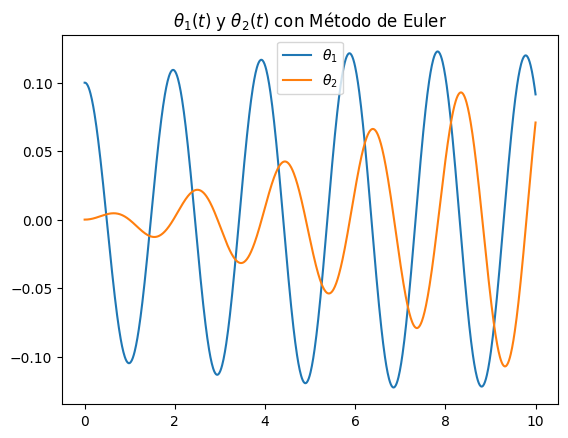

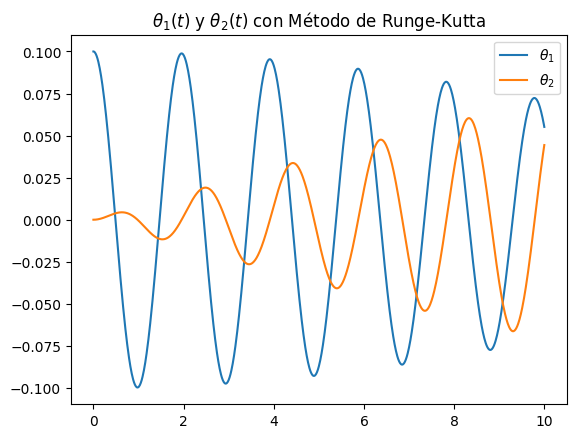

In [ ]:
t_euler, y_euler = solucion_euler(t_inicial,t_final,y0,dt,A)
t_rk4, y_rk4 = solucion_rk4(t_inicial,t_final,y0,dt,A)

plt.plot(t_euler, y_euler[0], label = '$\\theta_1$')
plt.plot(t_euler, y_euler[2], label = '$\\theta_2$')
plt.title('$\\theta_1(t)$ y $\\theta_2(t)$ con Método de Euler')
plt.legend()
plt.show()

plt.plot(t_rk4, y_rk4[0], label = '$\\theta_1$')
plt.plot(t_rk4, y_rk4[2], label = '$\\theta_2$')
plt.title('$\\theta_1(t)$ y $\\theta_2(t)$ con Método de Runge-Kutta')
plt.legend()
plt.show()


Los resultados obtenidos por los métodos de optimización de Scipy proporcionan una gráfica muy similar a las que proporcionan los métodos de Euler y RK4

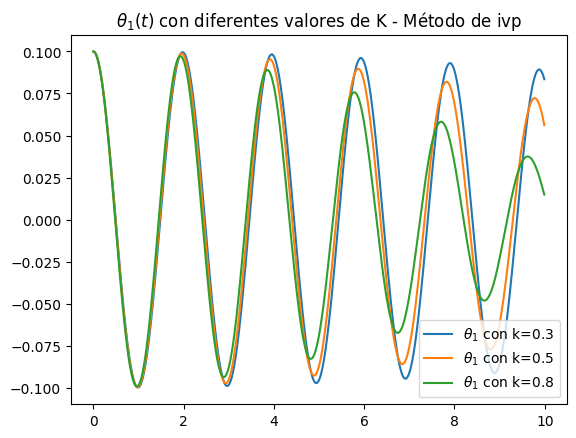

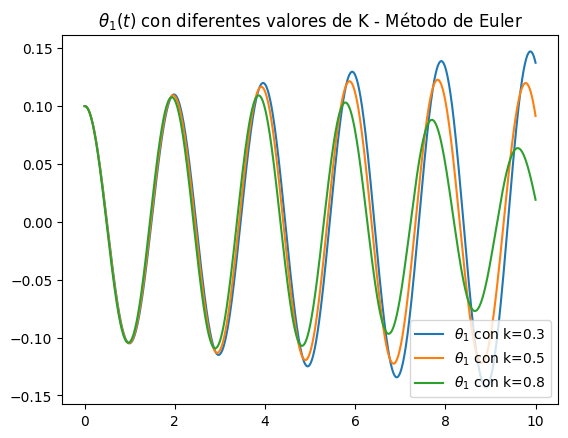

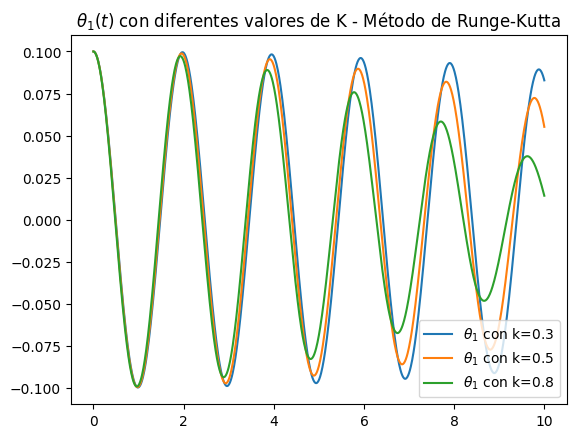

In [ ]:
#Estabilidad de la solución

k1 = 0.3
k2 = 0.5
k3 = 0.8

A1 = np.array([
    [0,1,0,0],
    [-(g/L + k1/m),0, k1/m ,0],
    [0,0,0,1],
    [k1/m , 0, -(g/L + k1/m),0]
])

A2 = np.array([
    [0,1,0,0],
    [-(g/L + k2/m),0, k2/m ,0],
    [0,0,0,1],
    [k2/m , 0, -(g/L + k2/m),0]
])

A3 = np.array([
    [0,1,0,0],
    [-(g/L + k3/m),0, k3/m ,0],
    [0,0,0,1],
    [k3/m , 0, -(g/L + k3/m),0]
])

def solucion_k1(t,y):
  return A1@y
sol_final_k1 = solve_ivp(solucion_k1, [t_inicial,t_final], y0, method='RK45', t_eval=t)

def solucion_k2(t,y):
  return A2@y
sol_final_k2 = solve_ivp(solucion_k2, [t_inicial,t_final], y0, method='RK45', t_eval=t)

def solucion_k3(t,y):
  return A3@y
sol_final_k3 = solve_ivp(solucion_k3, [t_inicial,t_final], y0, method='RK45', t_eval=t)

t_euler_k1, y_euler_k1 = solucion_euler(t_inicial,t_final,y0,dt,A1)
t_euler_k2, y_euler_k2 = solucion_euler(t_inicial,t_final,y0,dt,A2)
t_euler_k3, y_euler_k3 = solucion_euler(t_inicial,t_final,y0,dt,A3)

t_rk4_k1, y_rk4_k1 = solucion_rk4(t_inicial,t_final,y0,dt,A1)
t_rk4_k2, y_rk4_k2 = solucion_rk4(t_inicial,t_final,y0,dt,A2)
t_rk4_k3, y_rk4_k3 = solucion_rk4(t_inicial,t_final,y0,dt,A3)

#ivp
t_sol_k1 = sol_final_k1.t
y_sol0_k1 = sol_final_k1.y[0]

t_sol_k2 = sol_final_k2.t
y_sol_k2 = sol_final_k2.y[0]

t_sol_k3 = sol_final_k3.t
y_sol_k3 = sol_final_k3.y[0]

plt.plot(t_sol_k1, y_sol0_k1, label = '$\\theta_1$ con k=0.3')
plt.plot(t_sol_k2, y_sol_k2, label = '$\\theta_1$ con k=0.5')
plt.plot(t_sol_k3, y_sol_k3, label = '$\\theta_1$ con k=0.8')
plt.title('$\\theta_1(t)$ con diferentes valores de K - Método de ivp')
plt.legend()
plt.show()

plt.plot(t_euler_k1, y_euler_k1[0], label = '$\\theta_1$ con k=0.3')
plt.plot(t_euler_k2, y_euler_k2[0], label = '$\\theta_1$ con k=0.5')
plt.plot(t_euler_k3, y_euler_k3[0], label = '$\\theta_1$ con k=0.8')
plt.title('$\\theta_1(t)$ con diferentes valores de K - Método de Euler')
plt.legend()
plt.show()

plt.plot(t_rk4_k1, y_rk4_k1[0], label = '$\\theta_1$ con k=0.3')
plt.plot(t_rk4_k2, y_rk4_k2[0], label = '$\\theta_1$ con k=0.5')
plt.plot(t_rk4_k3, y_rk4_k3[0], label = '$\\theta_1$ con k=0.8')
plt.title('$\\theta_1(t)$ con diferentes valores de K - Método de Runge-Kutta')
plt.legend()
plt.show()

Lo que se puede identificar de las gráficas con distintos valores de k para los métodos de Euler y RK4 es que ambos parecen ser estables respecto a ivp de scipy pues las graficas son muy parecidas. Esto es de esperarse puesto que el dt que estamos tomando es muy pequeño.

# 8
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.  

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento de la partícula testigo son:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$  

donde $U$ es el **potencial efectivo** del sistema, definido como:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2).
$$

Aquí, $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$, respectivamente. En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y la constante gravitacional está absorbida en la normalización, la **velocidad angular del sistema** es:  

$$
\omega^2 = 1.
$$  

Existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran.  

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$- Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter



Tenemos que:

$$
U = -\frac{Gm_1}{r_1} - \frac{Gm_2}{r_2} - \frac{1}{2}\omega^2(x^2+y^2)
$$

Cambiando a coordenadas adimensionales tenemos que:

La masa relativa está dada por:
$$
\mu = \frac{m_2}{m_1+m_2} , 1-\mu = \frac{m_1}{m_1 + m_2}
$$

Como $\omega^2 = 1$ podemos escribir U como:

$$
U = -\frac{1-\mu}{r_1} - \frac{\mu}{r_2} - \frac{1}{2}(x^2+y^2)
$$

In [ ]:
mu =-1
r1 =(-mu,0)
r2=(1-mu,0)

norma_r1= np.linalg.norm(r1)
norma_r2= np.linalg.norm(r2)
r1_lam= lambda x,y: np.sqrt((x+mu)**2 + (y)**2)
r2_lam= lambda x,y: np.sqrt((x-(1-mu))**2 + (y)**2)

print(norma_r1)
print(norma_r2)

1.0
2.0


In [ ]:
import scipy
from scipy.misc import derivative
import sympy as sp

In [ ]:
x, y = sp.symbols('x y')

mu = -1

r1 = sp.sqrt((x + mu)**2 + y**2)
r2 = sp.sqrt((x - (1 - mu))**2 + y**2)

# Potencial efectivo
u = -100/norma_r1 - 200/norma_r2 - (1/2) * (x**2 + y**2)

# Segundas derivadas parciales
a = sp.diff(u, x, x)
b = sp.diff(u, x, y)
c = sp.diff(u, y, x)
d = sp.diff(u, y, y)

# Evaluar en L4
a_= a.subs([(x, 0.5 - mu), (y, sp.sqrt(3)/2)])
b_= b.subs([(x, 0.5 - mu), (y, np.sqrt(3)/2)])
c_= c.subs([(x, 0.5 - mu), (y, np.sqrt(3)/2)])
d_= d.subs([(x, 0.5 - mu), (y, sp.sqrt(3)/2)])

print("a =", a_)
print("b =", b_)
print("c =", c_)
print("d =", d_)

a = -1.00000000000000
b = 0
c = 0
d = -1.00000000000000


In [ ]:
#Valores propios de A

def matriz(a,b,c,d):
  A=np.array([[0,1,0,0],[a,0,b,2],[0,0,0,1],[c,-2,d,0]],dtype=float)
  return A

A=matriz(a_,b_,c_,d_)

val_p=np.linalg.eigvals(A)
print(val_p)


[0.+2.41421356j 0.-2.41421356j 0.+0.41421356j 0.-0.41421356j]


In [ ]:
#intervalo de eval
mu_vals=np.linspace(1e-5,1,100)

a_list = []
b_list = []
c_list = []
d_list = []

for i, mu_ in enumerate(mu_vals):

  r1 =(-mu_,0)
  r2=(1-mu_,0)

  norma_r1= np.linalg.norm(r1)
  norma_r2= np.linalg.norm(r2)

  # Potencial efectivo
  u = -(10)/norma_r1 - 20/norma_r2 - (1/2) * (x**2 + y**2)

  # Segundas derivadas parciales
  a = sp.diff(u, x, x)
  b = sp.diff(u, x, y)
  c = sp.diff(u, y, x)
  d = sp.diff(u, y, y)

  # Evaluar en L4
  a_= a.subs([(x, 0.5 - mu_), (y, sp.sqrt(3)/2)])
  b_= b.subs([(x, 0.5 - mu_), (y, np.sqrt(3)/2)])
  c_= c.subs([(x, 0.5 - mu_), (y, np.sqrt(3)/2)])
  d_= d.subs([(x, 0.5 - mu_), (y, np.sqrt(3)/2)])

  a_list.append(a_)
  b_list.append(b_)
  c_list.append(c_)
  d_list.append(d_)

a = np.array(a_list)
b = np.array(b_list)
c = np.array(c_list)
d = np.array(d_list)

<ipython-input-16-d85fc368e29c>:18: RuntimeWarning: divide by zero encountered in scalar divide
  u = -(10)/norma_r1 - 20/norma_r2 - (1/2) * (x**2 + y**2)


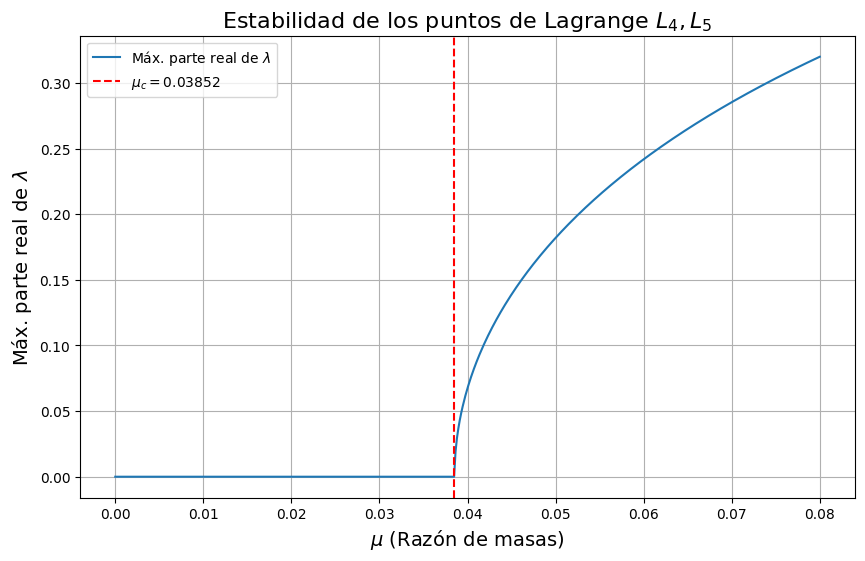

In [30]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

def segundas_derivadas(mu):
    U_xx = 3/4
    U_xy = (3*np.sqrt(3)/4) * (1 - 2*mu)
    U_yy = 9/4
    return U_xx, U_xy, U_yy

def matriz_estabilidad(mu):
    U_xx, U_xy, U_yy = segundas_derivadas(mu)
    A = np.array([
        [0, 1, 0, 0],
        [U_xx, 0, U_xy, 2],
        [0, 0, 0, 1],
        [U_xy, -2, U_yy, 0]
    ])
    return A

# calcular los valores propios
def calcular_vp(mu):
    A = matriz_estabilidad(mu)
    eigenvalues, _ = eig(A)
    return eigenvalues

# calcular la máxima parte real de los valores propios
def max_real_part(mu_values):
    max_real_parts = []
    for mu in mu_values:
        eigenvalues = calcular_vp(mu)
        real_parts = np.real(eigenvalues)
        max_real_parts.append(np.max(real_parts))
    return max_real_parts

# Valores de mu para probar
mu_values = np.linspace(0, 0.08, 500)

# Calcular la máxima parte real para cada mu
max_real_parts = max_real_part(mu_values)

plt.figure(figsize=(10, 6))
plt.plot(mu_values, max_real_parts, label="Máx. parte real de $\\lambda$")
plt.axvline(x=0.03852, color='red', linestyle='--', label='$\\mu_c = 0.03852$')
plt.xlabel('$\\mu$ (Razón de masas)', fontsize=14)
plt.ylabel('Máx. parte real de $\\lambda$', fontsize=14)
plt.title('Estabilidad de los puntos de Lagrange $L_4, L_5$', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

Para $\mu < \mu_c$ la parte real de los autovalores es 0 (son imaginarios puros). Esto indica que los puntos $L_4$ y $L_5$ son estables, ya que cualquier perturbación resultará en oscilaciones en lugar de crecimiento exponencial

Para $\mu > \mu_c$ la parte real de los autovalores es positiva, lo que significa que hay oscilaciones con crecimiento exponencial. En esta región, $L_4$ y $L_5$ se vuelven inestables porque las perturbaciones se amplifican.

Para el sistema Sol-Tierra, el valor aproximado de $\mu$ es:

$$
\mu_{Sol-Tierra} = \frac{M_{Tierra}}{M_{Sol}+M_{Tierra}} \approx 3 \times 10^{-6}
$$

Para el sistema Sol-Júpiter, el valor aproximado de $\mu$ es:

$$
\mu_{Sol-Júpiter} = \frac{M_{Júpiter}}{M_{Sol}+M_{Júpiter}} \approx 9.5 \times 10^{-4}
$$

Podemos ver que tanto para Sol-Tierra como para Sol-Júpiter, $\mu$ está muy por debajo del valor crítico, indicando que $L_4$ y $L_5$ son estables en estos sistemas.

# 9

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  



**Para solucionar el problema de manera matricial definimos:**

Sistema de ecuaciones diferenciales:

$$
\frac{d}{dt}X = AX
$$

donde:

$$
X = [x_1 \ x_2]^T
$$

con $x_1 = \Sigma(t)$ y $x_2 = \frac{d \Sigma}{dt}$

La matriz del sistema es:

A =\begin{equation}
\begin{bmatrix}
0 & 1 \\
-\kappa^2 & 0 \\
\end{bmatrix}
\end{equation}



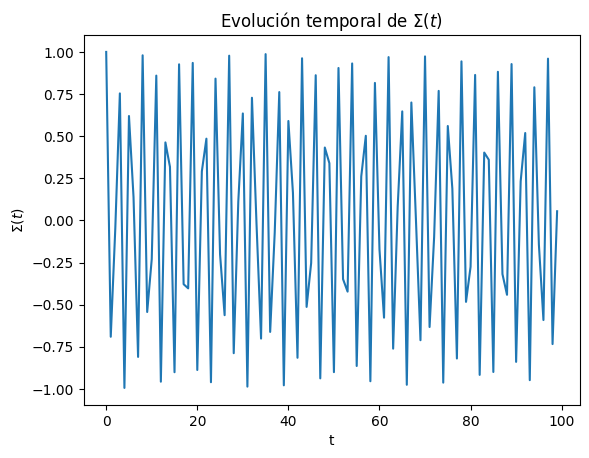

In [32]:
#ivp
from scipy.integrate import solve_ivp

#parametros
r=8
v0=200
omega=v0/r
kappa=np.sqrt(2)*omega

#valores iniciales
x0=np.array([1,0])

t_inicial=0
t_final=100
dt=1
t=np.arange(t_inicial,t_final,dt)

A=np.array([[0,1],[-kappa**2,0]])

def solucion(t,x):
  return A@x

sol_final=solve_ivp(solucion,[t_inicial,t_final],x0,method='RK45',t_eval=t)

t_sol=sol_final.t
sigma_sol=sol_final.y[0]

plt.plot(t_sol,sigma_sol)
plt.title('Evolución temporal de $\Sigma(t)$')
plt.xlabel('t')
plt.ylabel('$\Sigma(t)$')
plt.show()

In [33]:
#Valores propios Matriz

vp=np.linalg.eigvals(A)
print(vp)

[0.+35.35533906j 0.-35.35533906j]


Los autovalores al ser imaginarios puros, implican que las perturbaciones del disco galáctivo no se amortiguan ni crecen indefinidamente, más bien se mantienen oscilando de manera estable.

Solución Analítica:

$$
\Sigma''+\kappa^2\Sigma = 0
$$

$$
r^2 + \kappa^2 = 0
$$

$$
r = \pm ik
$$

$$
\Sigma(t) = c_1 e^{0x}\cos(kt) + c_2e^{0x}\sin(kt)
$$

$$
\Sigma(t) = c_1 \cos(kt) + c_2\sin(kt)
$$

$$
\Sigma'(t) = -kc_1 \sin(kt) + kc_2\cos(kt)
$$

Como $\Sigma(0) = 1$ tenemos que:

$$
1 = c_1 \cos(0) + c_2\sin(0)
$$

$$
c_1 = 1
$$

Como $\Sigma'(0) = 0$ tenemos que:

$$
0 = -kc_1 \sin(0) + kc_2\cos(0)
$$

$$
c_2 = 0
$$

$$
\therefore \Sigma(t) = \cos(kt)
$$

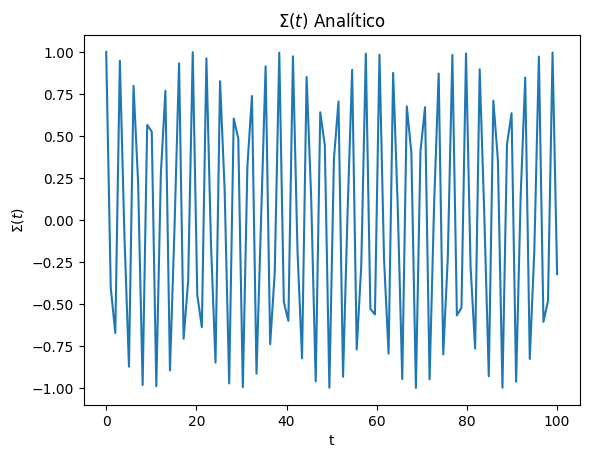

In [ ]:
#Solución analítica

sigma_analitica = lambda t: np.cos(k*t)
t = np.linspace(0,100,100)
plt.plot(t,sigma_analitica(t))
plt.title('$\Sigma(t)$ Analítico')
plt.xlabel('t')
plt.ylabel('$\Sigma(t)$')
plt.show()


In [ ]:
k1=1
k2=50
k3=100

def diferente_k(kappa_):
  A=np.array([[0,1],[-kappa_**2,0]])
  sol_final=solve_ivp(solucion,[t_inicial,t_final],x0,method='RK45',t_eval=t)

  t_sol=sol_final.t
  sigma_sol=sol_final.y[0]

  plt.plot(t_sol,sigma_sol)
  plt.title(f'$\Sigma(t)$ para k={kappa_}')
  plt.xlabel('t')
  plt.ylabel('$\Sigma(t)$')
  plt.show()

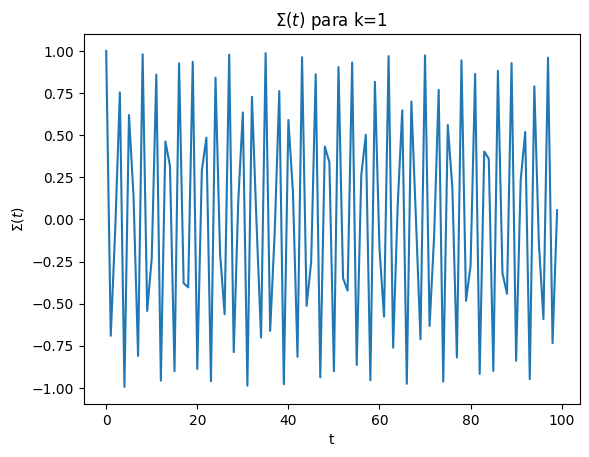

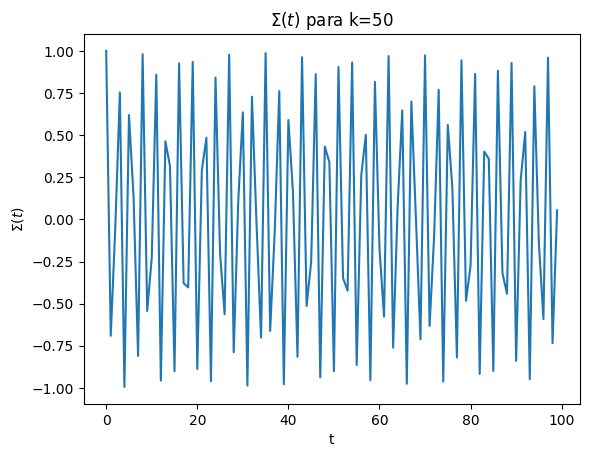

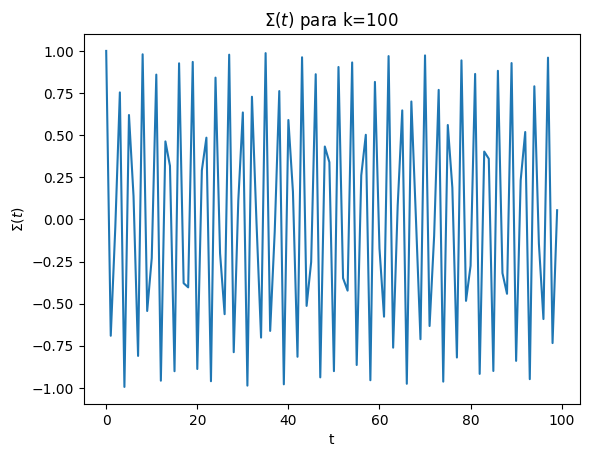

In [ ]:
diferente_k(k1)
diferente_k(k2)
diferente_k(k3)

Como al variar k la gráfica sigue teniendo el mismo comportamiento, entonces podemos concluir que para diferentes velocidades y radios de los discos galácticos, estos van a ser estables.


**FIN**